Patrycja Biryło 1230032 <br>
Štěpán Zelenka 1230017 <br>
https://github.com/qettera/Machine-Learning-Overview

In [30]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import mean_squared_error #, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from patsy import dmatrix
import statsmodels.api as sm
import numpy as np

import warnings
warnings.filterwarnings("ignore")



## 1. Exploratory Data Analysis

The mel frequency cepstral coefficients (MFCCs) of an audio signal are a small set of features (usually about 10–20) which describe the overall shape of the spectral envelope. MFCCs were frequently used for voice recognition before the task started to be performed using deep learning.

*for each sound: 13 means (media) and 13 standard deviations (desvio)*

In [31]:
import pandas as pd
# This is loading a csv which is a result of merging three csv files with car horn, gunshot and jackhammer MFCC data.
df = pd.read_csv('all.csv')

In [32]:
df.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.677986,-1.966398,1.688301,-3.354441,1.043490,-1.798730,-0.767414,-1.614851,-0.185658,-0.029143,...,1.890468,1.410196,0.803002,1.311613,0.601646,0.769883,0.416295,0.564592,0.349746,car_horn
1,4.677564,-2.953498,1.426739,-2.261733,0.930528,-2.665626,-0.332971,-0.714048,0.139587,-0.898208,...,1.472251,2.427163,0.554742,0.577265,0.766374,0.758806,0.532139,0.454760,0.376218,car_horn
2,3.872289,-3.173699,1.931834,-1.202015,0.610031,-2.204595,-0.295343,-0.319409,-0.161939,-1.040936,...,1.159666,2.092606,0.540943,0.634752,0.439129,1.018796,0.385876,0.508423,0.394474,car_horn
3,5.160424,-3.750595,2.151555,-1.886166,1.334776,-2.151562,-0.546990,-0.359816,0.054898,-1.013008,...,1.627613,2.086991,0.654731,0.591023,0.497059,0.950790,0.567042,0.393286,0.332839,car_horn
4,2.252624,-3.644894,1.939464,-1.974539,1.823046,-1.844794,-1.132419,-0.942162,0.582952,-0.769522,...,2.167108,1.868980,1.226150,1.161215,1.018720,0.892772,0.453530,0.655595,0.546549,car_horn


### Descriptive Statistics
**Let’s start with the descriptive statistics to get an overview of the numerical columns in the dataset.**

In [33]:
# Generate descriptive statistics of the numerical columns
df.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,...,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,3.495076,-2.184187,1.073255,-0.698825,0.455421,-0.364949,0.287642,0.002218,0.228245,-0.124225,...,1.210243,1.095423,0.908105,0.852591,0.728579,0.674253,0.647240,0.578561,0.553523,0.356440
std,3.605594,1.792660,1.425874,0.954231,0.904173,0.801812,0.731956,0.645442,0.515347,0.523789,...,0.628151,0.552409,0.544199,0.438909,0.346493,0.289774,0.300969,0.251892,0.239224,0.066549
min,-4.672307,-9.984891,-5.472591,-4.068377,-4.362307,-3.794095,-2.701501,-1.856276,-2.150302,-2.626062,...,0.334159,0.295266,0.265892,0.280354,0.280959,0.136682,0.267503,0.190234,0.176745,0.163466
25%,0.401549,-3.338016,0.517790,-1.269979,-0.105763,-0.866011,-0.110261,-0.397775,-0.132682,-0.408994,...,0.745493,0.625401,0.545898,0.536299,0.489104,0.460650,0.462194,0.412720,0.388282,0.315536
50%,3.897727,-2.127124,1.070444,-0.717425,0.528501,-0.334075,0.367085,-0.010347,0.248138,-0.135857,...,1.072896,1.024874,0.753169,0.738506,0.622663,0.590892,0.570859,0.515397,0.484400,0.343735
75%,6.220131,-1.201787,1.952195,-0.131011,1.133396,0.188993,0.767006,0.394905,0.589735,0.170755,...,1.517922,1.464322,1.073476,1.030323,0.855334,0.806172,0.745861,0.666146,0.635796,0.380651
max,10.602967,2.943808,4.826087,2.914812,3.156123,2.050018,2.381640,2.096199,2.274243,1.788323,...,4.357339,3.719680,4.920654,3.605649,2.860202,1.935464,2.905896,2.263505,2.240934,1.069302


**Data types & missing values**

Next, we should check the data types of each column and see if there are any missing values. As we can see, we have no missing values and all the values are numeric, so there is no need to clean the data.

In [34]:
# Check data types and missing values
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

df_info

,Data Type,Missing Values,Unique Values
media0,float64,0,1803
media1,float64,0,1803
media2,float64,0,1803
media3,float64,0,1801
media4,float64,0,1803
media5,float64,0,1801
media6,float64,0,1803
media7,float64,0,1802
media8,float64,0,1801
media9,float64,0,1802


As we can see, dataset is in a very good condition: no missing values and almost every value in it is unique.

### Univariate Analysis (Distribution of individual features)


I don't really know what insights to draw from these graphs.

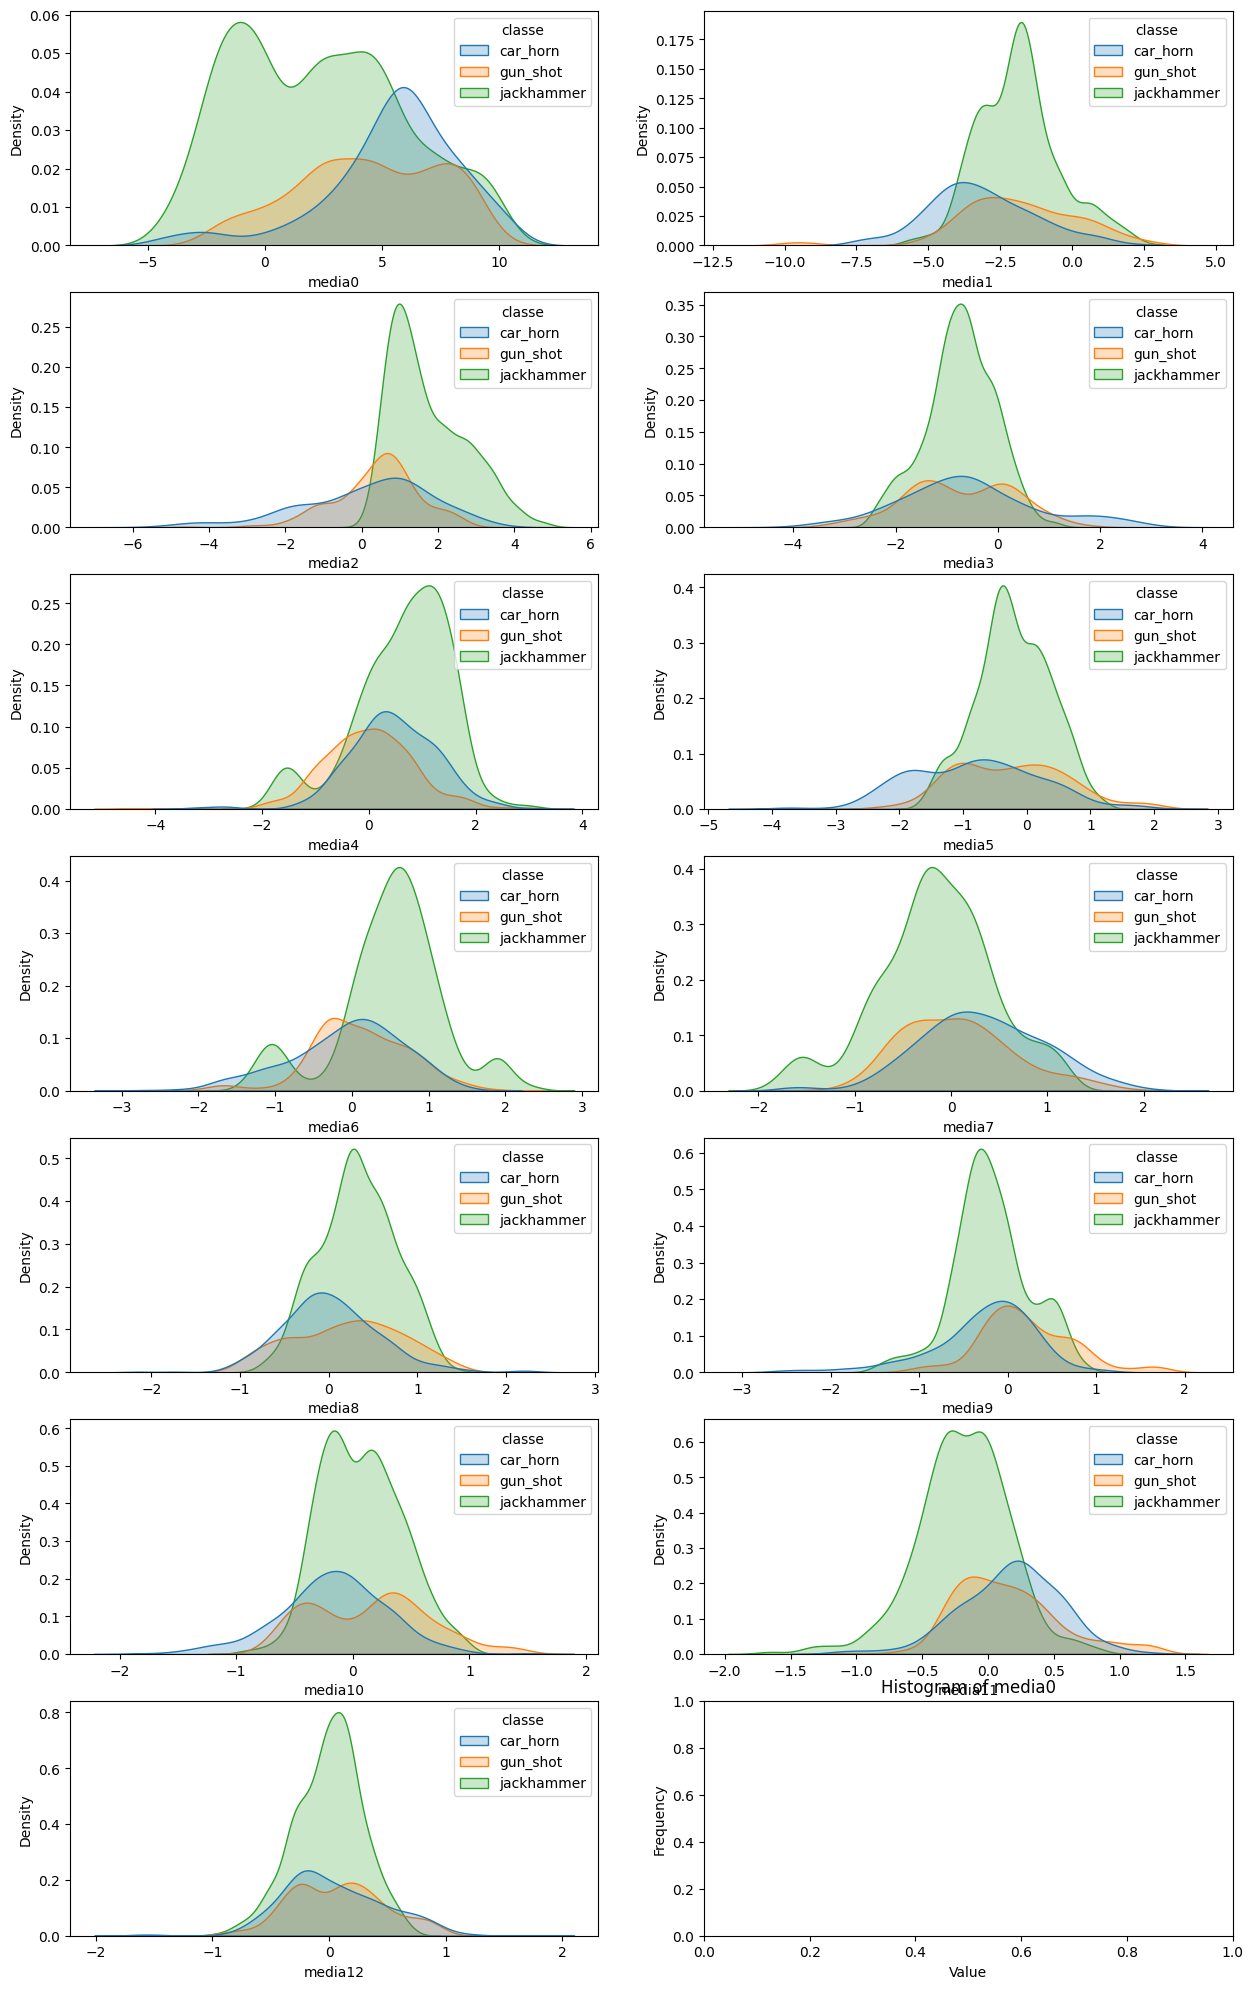

In [35]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.kdeplot(data=df, x='media' + str(i*2), hue='classe', shade=True, color='blue', ax=axes[i][0])
    if (i == 6):
        continue
    sns.kdeplot(data=df, x='media' + str(i*2 + 1), hue='classe', shade=True, color='blue', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

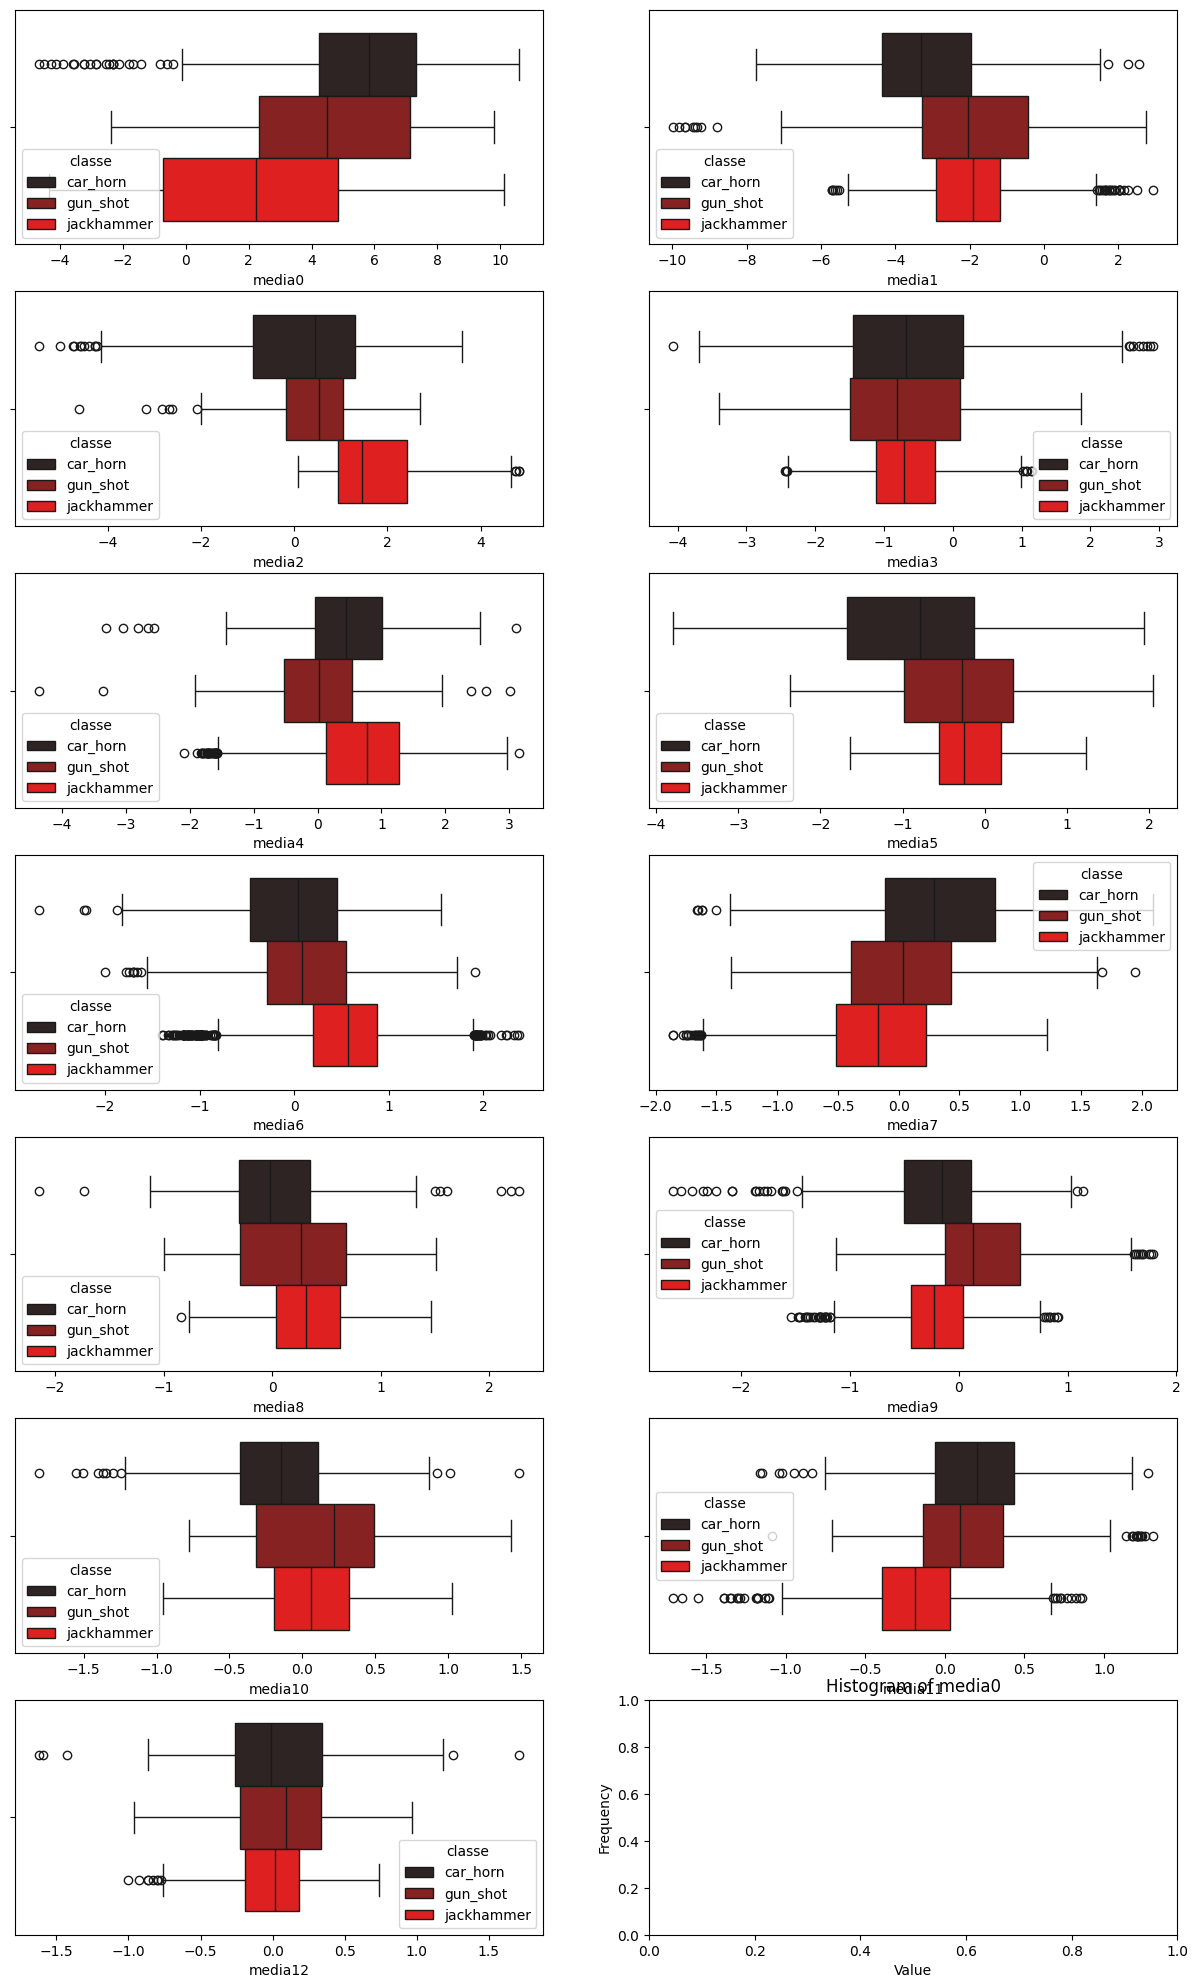

In [36]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.boxplot(data=df, x='media' + str(i*2), hue='classe', color='red', ax=axes[i][0])
    if (i == 6):
        continue
    sns.boxplot(data=df, x='media' + str(i*2 + 1), hue='classe', color='red', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

TODO outliers - we should try to identify outliers, remove them and test the methods with the outliers removed

coś o kwartylach skrajne 25% i skrajne 75% --- ale też się upewnić czy to tylko to co klasyfikuje outliers

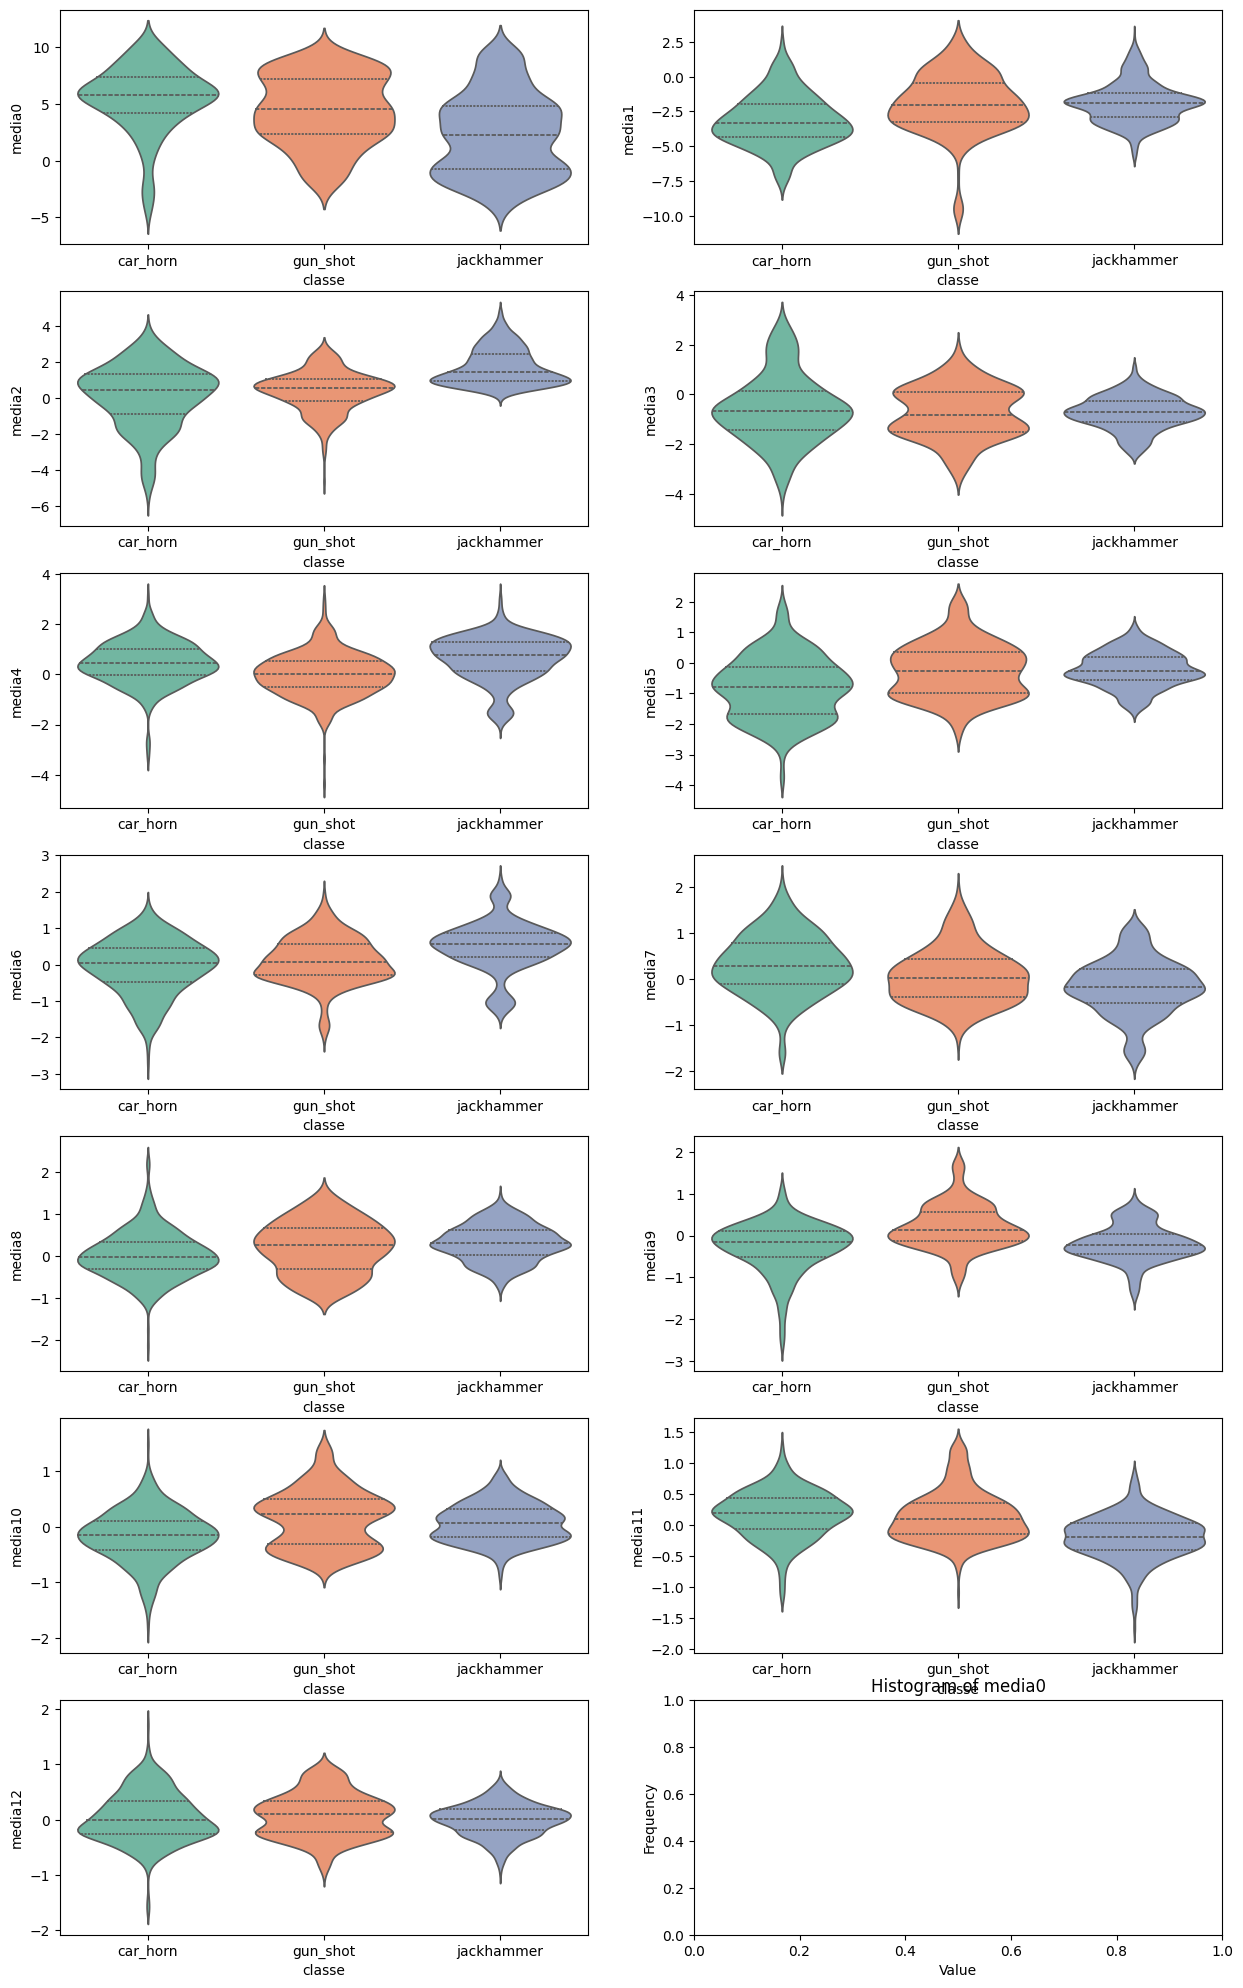

In [37]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.violinplot(data=df, x='classe', y='media' + str(i*2), inner='quart', palette='Set2', ax=axes[i][0])
    if (i == 6):
        continue
    sns.violinplot(data=df,x='classe', y='media' + str(i*2 + 1), inner='quart', palette='Set2', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

### Bivariate Analysis (Correlation between features and the different target variables)
**In the bivariate analysis, we need to understand the relationship between the individual features and the target variable: class of the sound.**

Here, we will plot the relationship between each mean and standard deviation. We will differentiate each of the 3 classes with a different style and see how the values differ for each of the class.
The idea is to find some mean-std pairs where we can see the difference between the classes.

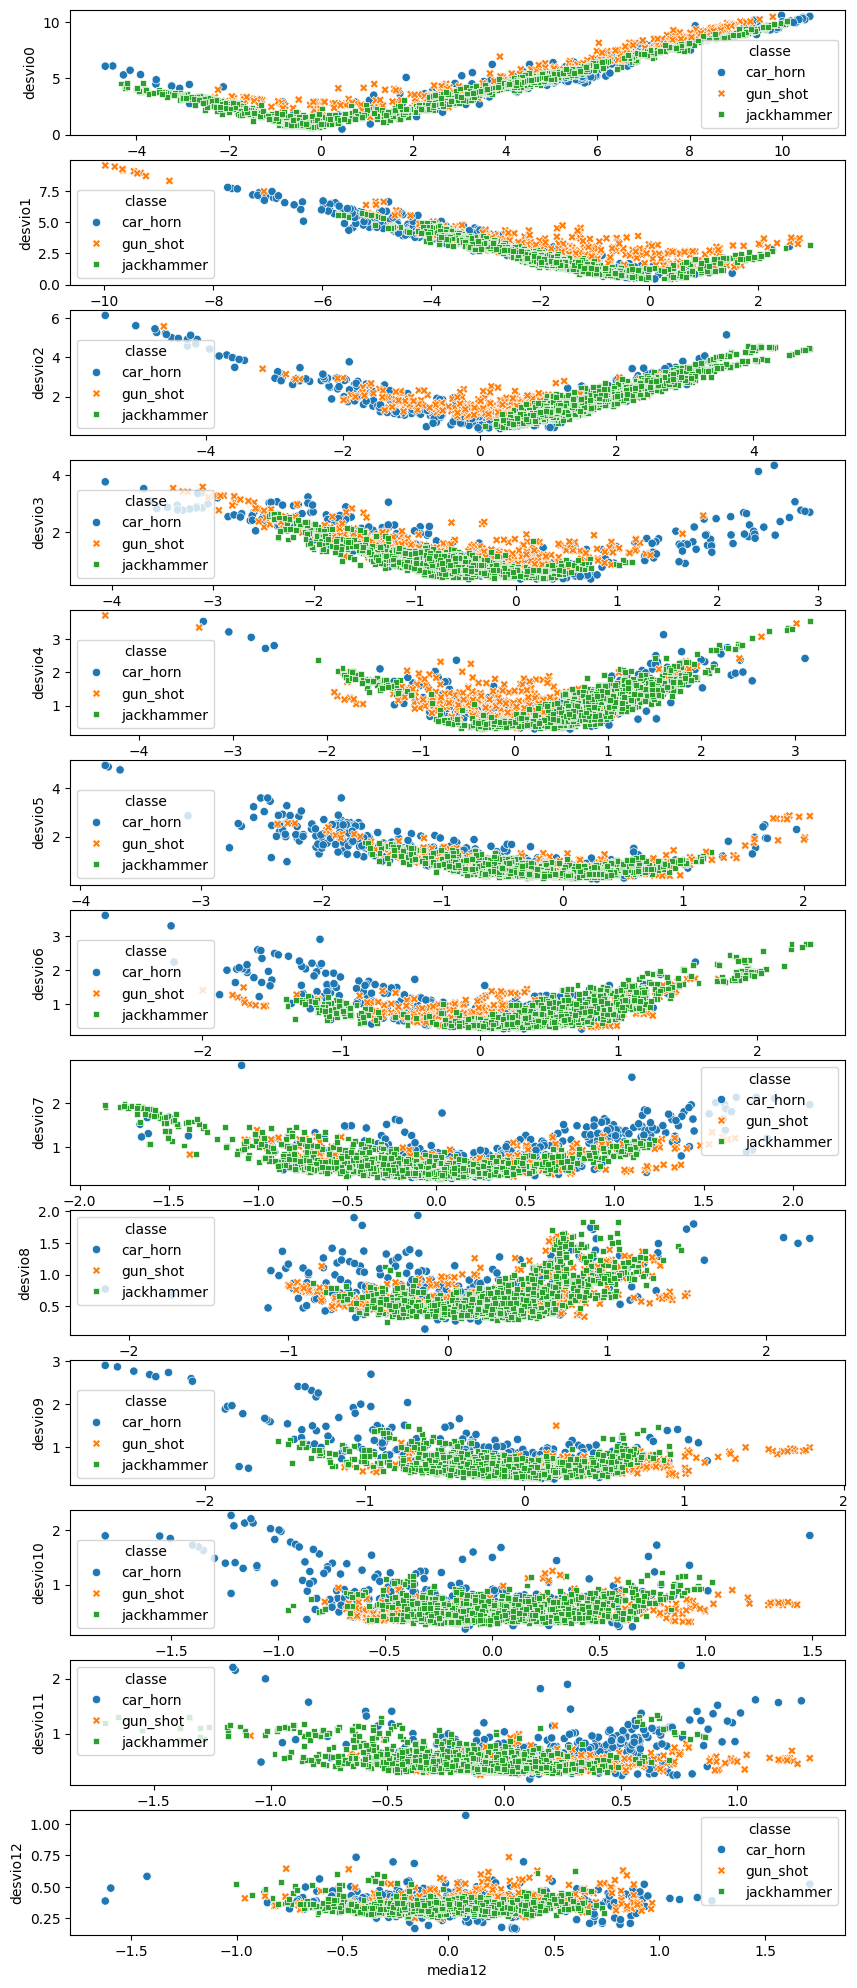

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(13, 1, figsize=(10,25))

for i in range(0,13):
    j = str(i)
    sns.scatterplot(data=df, x='media' + j, y='desvio' + j, ax=axes[i], hue='classe', style='classe')
plt.show()

From the graph, we see that some pairs have values very simillar for all the classes (e.g. the 1th or the 13th one), while in some we can see differences (namely 3rd one).
We can use this information to select (or maybe discard) the features that hold no information about the differences between each class.

może da się z tego wybrać kilka features i użyć do klasyfikacji (zamiast tamtego wykresu ala słupek heatmap)

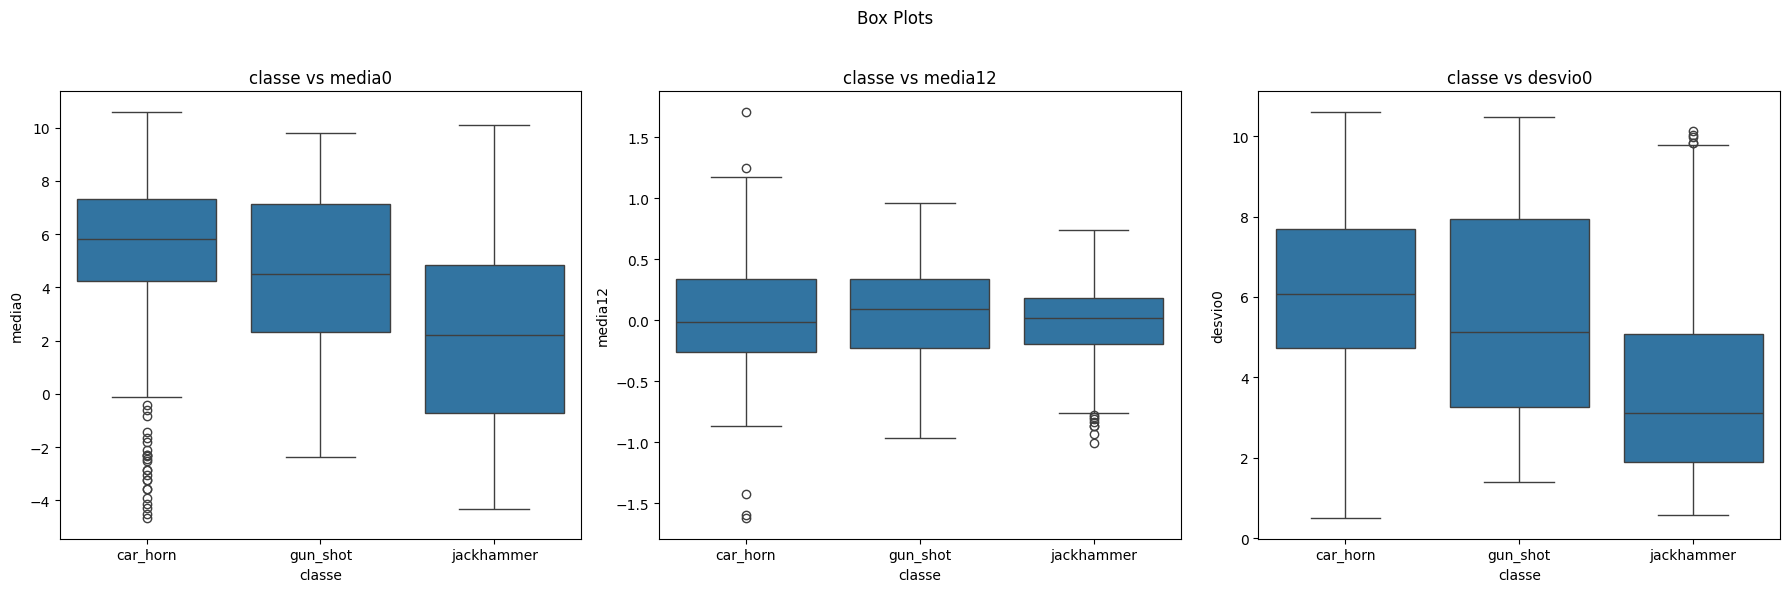

In [39]:
df = pd.read_csv('all.csv')

# Plot box plots for categorical variables vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots')

sns.boxplot(x='classe', y='media0', data=df, ax=axes[0])
axes[0].set_title('classe vs media0')

sns.boxplot(x='classe', y='media12', data=df, ax=axes[1])
axes[1].set_title('classe vs media12')

sns.boxplot(x='classe', y='desvio0', data=df, ax=axes[2])
axes[2].set_title('classe vs desvio0')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 2. Methods Application
Consider using the following methods: Logistic Regression, Linear Discriminant Analysis (LDA)
and Quadratic Discriminant Analysis (QDA). Applying the methods to the chosen data, try to
decide which method is most appropriate for the problem, giving reasons for your choice. Use the
following resampling methods for the various suggested models: <br>
• Holdout<br>
• Cross Validation (with k = 5 and k = 10)<br>
• Leave One Out Cross Validation (LOOCV)<br>
• Bootstrap<br>
Use the evaluation metrics that you find most appropriate to evaluate the results obtained
in each experiment. Analyzing the results obtained, indicate how the variance is affected by the
resampling methods used.

Before applying the evaluation method and metrics, we will split the dataset into features and target values, which will then utilized afterwards.

In [40]:
X = df.drop(['classe'], axis=1)
y = df['classe']

### Holdout

wzory matematyczne dla 3 klas a nie 2 klas, dla 3 klas troche inaczej

For understanding the classification report and confusion matrix:  
*Precision* = $TP / (TP + FP)$  
*Recall* = $TP / (TP + FN)$  
*F1-Score* = $2 * (Precision * Recall) / (Precision + Recall)$  
*Accuracy* = $(TP + TN) / (TP + TN + FP + FN)$  
*Average vs Weighted Average* = Weighted average also considers the number of instaces for each class in the dataset

logistic regression pay attention only for 2 classes

it works - but how and why
maybe it divides 3 classes into binary problem like: car horn - 1, others - 0 soo

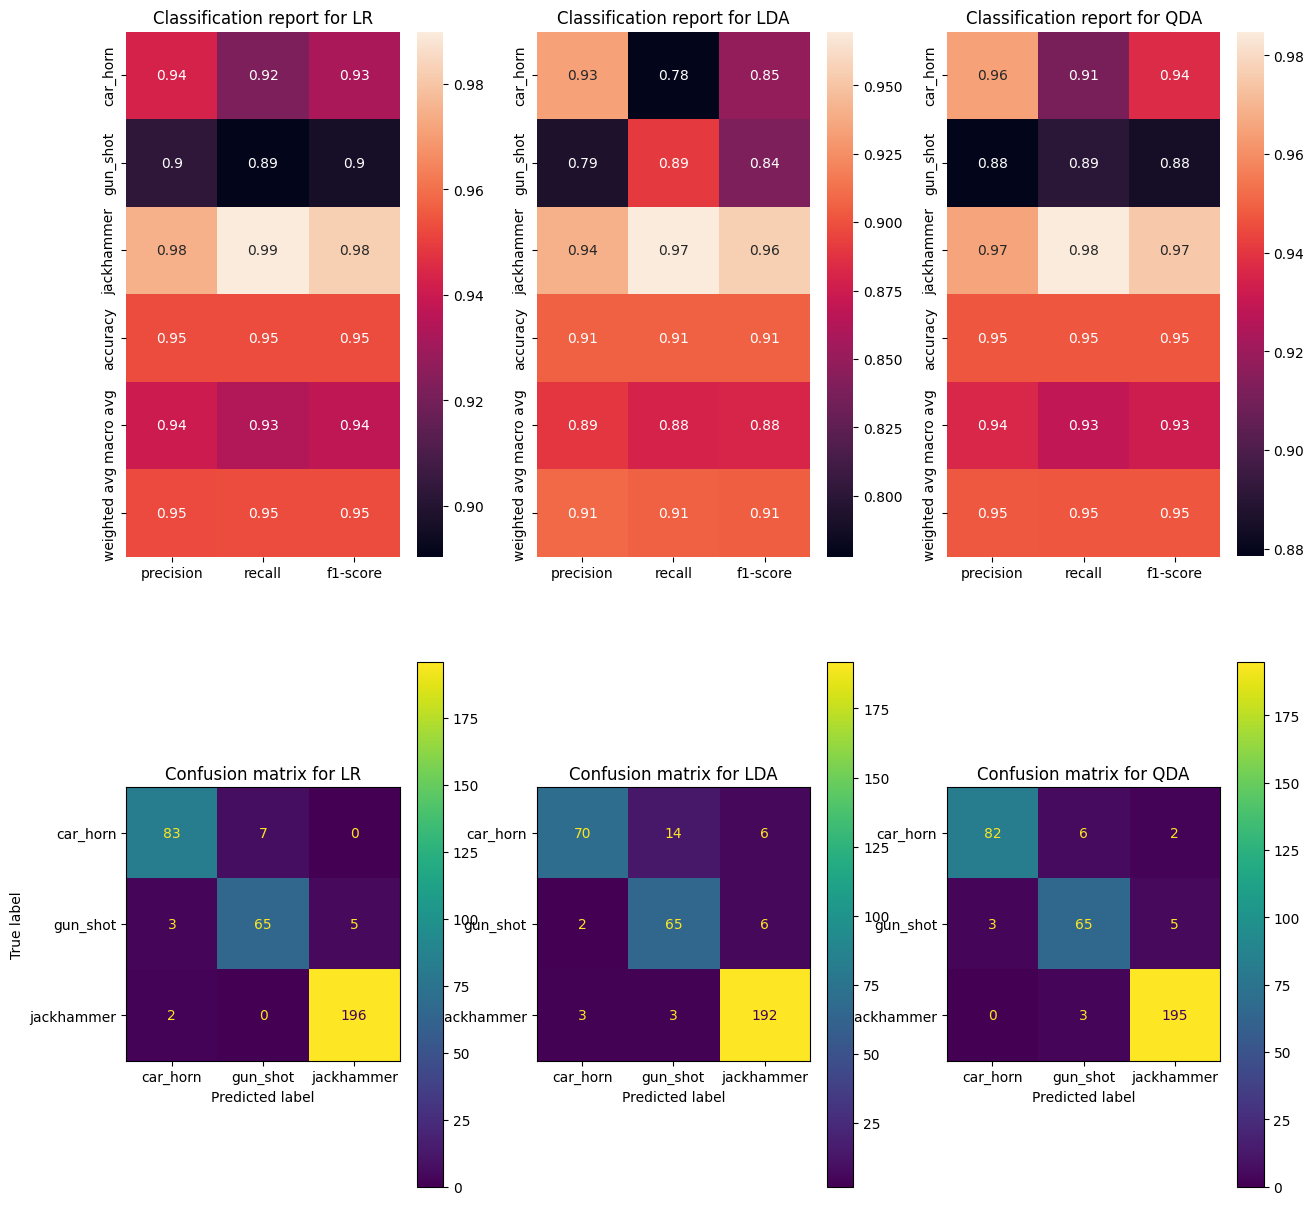

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {'LR':LogisticRegression(), 'LDA': LDA(), 'QDA': QDA()}


f, axes = plt.subplots(2, 3, figsize=(15, 15))

for idx, (name, model) in enumerate(models.items()):
    col = idx

    # Training the model
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Creating the metrics
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    clf_report = classification_report(y_test, y_pred, output_dict=True)

    # Plotting the metrics
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=axes[0][col])
    axes[0][col].set_title(f'Classification report for {name}')
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot(ax=axes[1][col])
    axes[1][col].set_title(f'Confusion matrix for {name}')


Looking at the results, we see that LDA performed the worst, as it did mistake gunshot with carhorn a lot of the times, decreasing the recall for car_horn and precision for gun_shot quite substantially.
The performace of LR and QDA are quite comparable, altough QDA performed a bit better.  
Based on this test, __QDA__ is the best choice.

### Cross Validation
We will use the cross validation to evaluate each model's performance.

In [42]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


print('Cross validation with cv=5')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nCross validation with cv=10')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nLeave One Out Cross validation (cv=1803)')
for name,model in models.items():
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo)
    print(f'Result for {name}: Mean = {scores.mean()}, std = {scores.std()}')

Cross validation with cv=5
Results for LR: Mean = 0.8074207448445676, std = 0.12109098986523116
Results for LDA: Mean = 0.753080947983995, std = 0.1235355638590949
Results for QDA: Mean = 0.7053662665435517, std = 0.09264621306584193

Cross validation with cv=10
Results for LR: Mean = 0.8546869244935543, std = 0.09107420613312885
Results for LDA: Mean = 0.8108624923265808, std = 0.10322106405234155
Results for QDA: Mean = 0.7902516881522406, std = 0.11053093425905197

Leave One Out Cross validation (cv=1803)
Result for LR: Mean = 0.9406544647809207, std = 0.23627027461921726
Result for LDA: Mean = 0.8901830282861897, std = 0.31266148537582705
Result for QDA: Mean = 0.9489739323349973, std = 0.22005092156964334


Based on the results from cross validation with $k=5$ and $k=10$, it would seem that __Logistic regression__ is the best choice.  
But assesing the model's performance with _LOOCV_, __QDA__ looks like the best choice, which is in agreement with the Holdout method.

### Bootstrap

In [43]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np


num_samples = 1000

bootstrap_scores = {
    'LR': [],
    'LDA': [],
    'QDA': []
}

for name, model in models.items():
    for _ in range(num_samples):
        X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=np.random.randint(1, 1000))
        
        model.fit(X_bootstrap, y_bootstrap)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        bootstrap_scores[name].append(accuracy)

In [44]:
for name, scores in bootstrap_scores.items():
    print(f'{name} mean = {np.mean(scores)}')

LR mean = 0.9458891966759003
LDA mean = 0.9135595567867035
QDA mean = 0.9524986149584487


From the _Bootstrap_ resampling technique, we once again see that __QDA__ is the best choice for our data.

## 3. Feature Selection
Can classification models obtain better results if they use just a few features instead of all available
features? Evaluate this hypothesis, using regularization methods.

***Classification models: logistic regression, LDA, QDA.***

### Choosing features

In [45]:
import pandas as pd
df = pd.read_csv('all.csv')

# car horn = 0, gunshot =1, jackhammer = 2
df['classe'].mask(df['classe'] == 'car_horn', 0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 1, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 2, inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

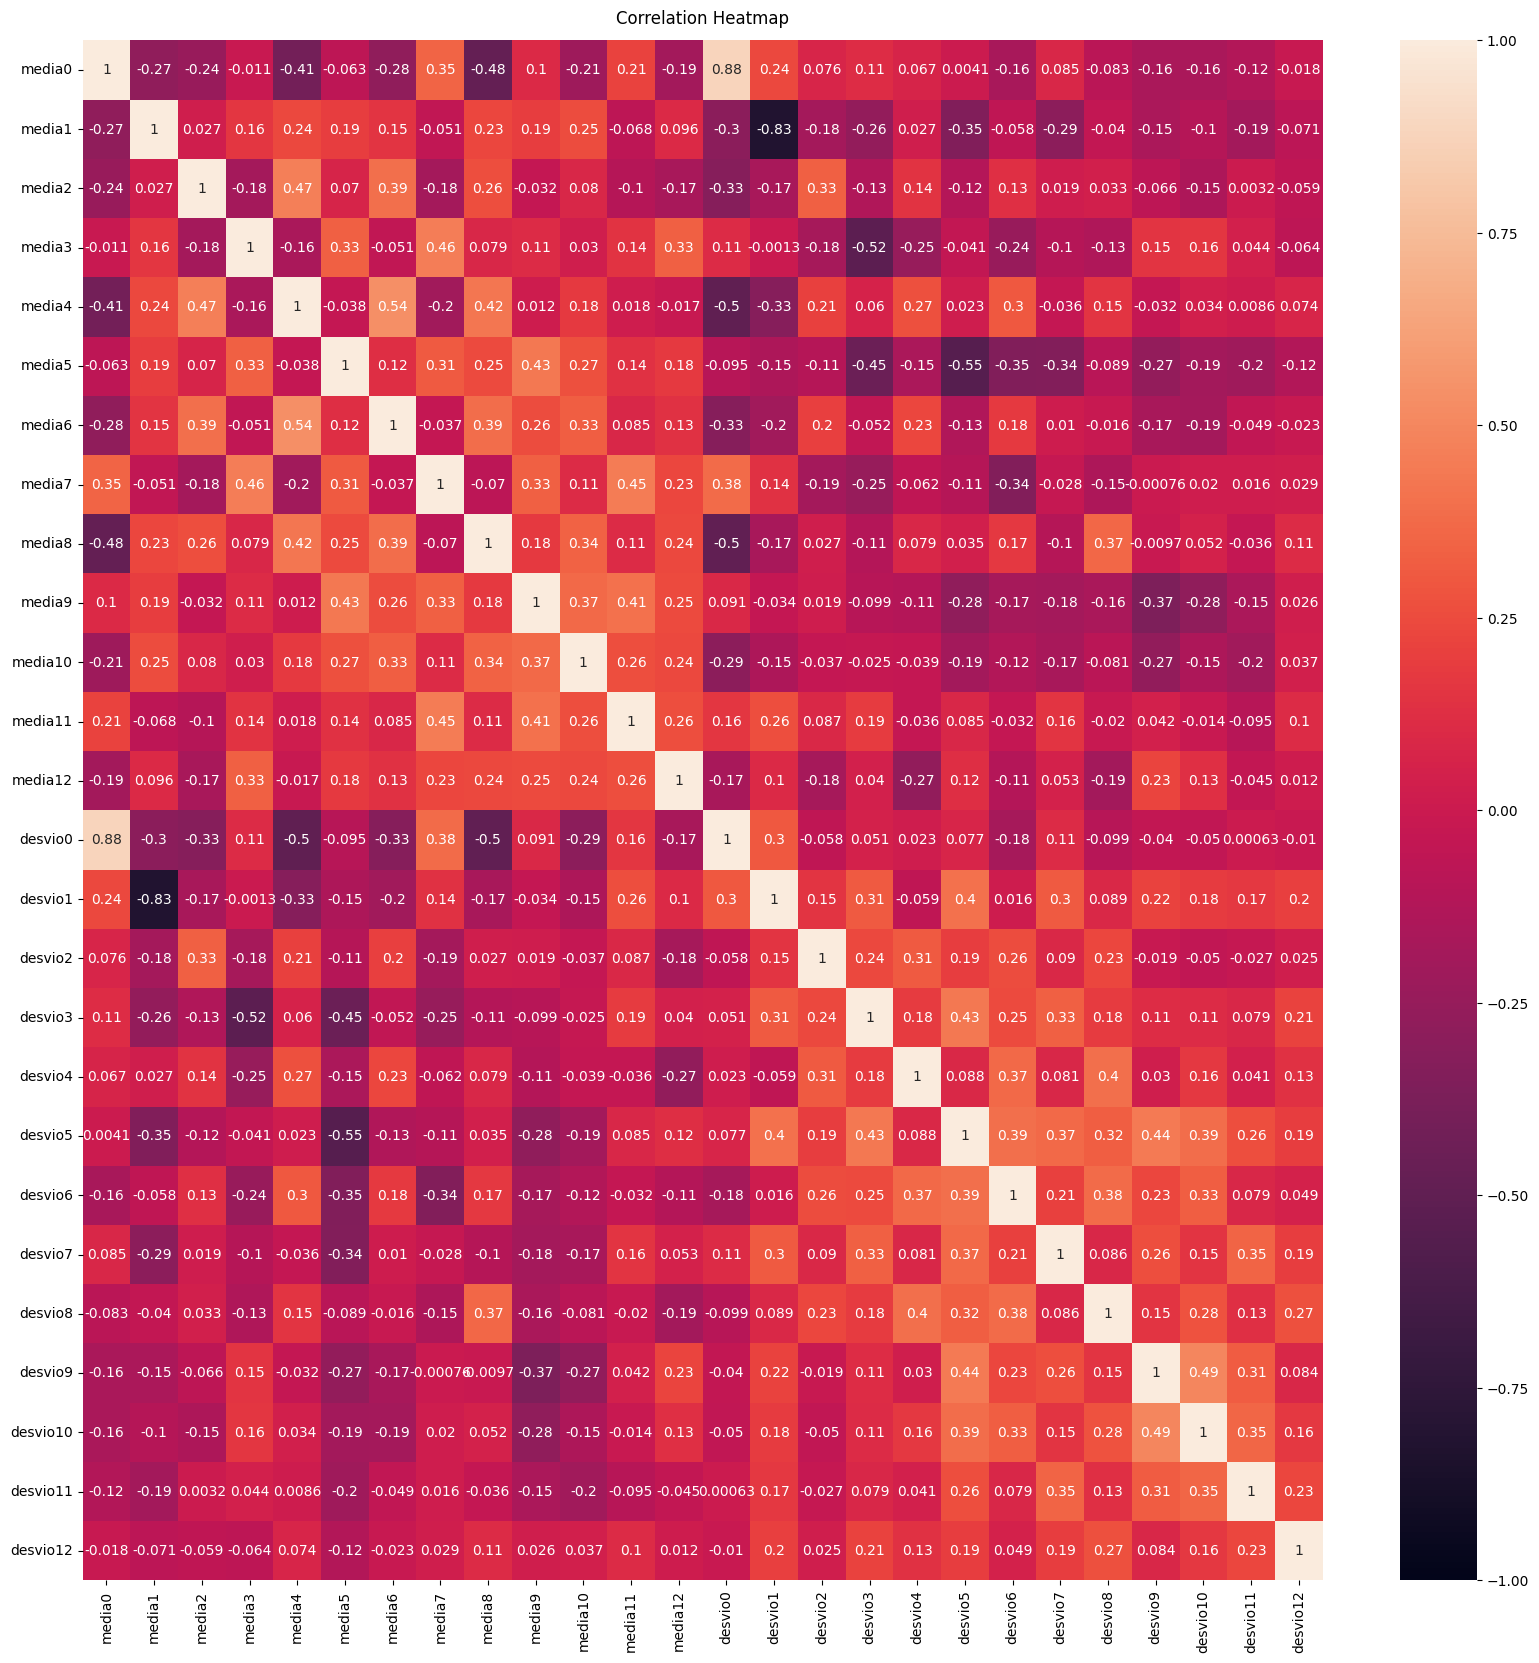

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
heatmap = sns.heatmap(df.drop('classe', axis=1).corr(),annot=True, vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Often, however, what we want to create, is a colored map that shows the strength of the correlation between every independent variable that we want to include in our model and the dependent variable.

kolumna heatmap nie działa, wybrać je inaczej

### Chosen features vs all

***media2, media5 and media6 have the highest correlation with the class of the sound - lest start with them***

In [47]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA


In [48]:
import pandas as pd
df = pd.read_csv('all.csv')

In [49]:
chosen_variables_x3 = df[['media2', 'media5', 'media6']]
chosen_variables_x3

,media2,media5,media6
0,1.688301,-1.798730,-0.767414
1,1.426739,-2.665626,-0.332971
2,1.931834,-2.204595,-0.295343
3,2.151555,-2.151562,-0.546990
4,1.939464,-1.844794,-1.132419
...,...,...,...
1798,2.750922,-0.113938,0.886541
1799,2.582896,-0.153874,0.875659
1800,2.829893,0.040686,1.047330
1801,2.943084,-0.060748,0.916639


In [50]:
y = df['classe']
y

0         car_horn
1         car_horn
2         car_horn
3         car_horn
4         car_horn
           ...    
1798    jackhammer
1799    jackhammer
1800    jackhammer
1801    jackhammer
1802    jackhammer
Name: classe, Length: 1803, dtype: object

In [51]:
def run_lr_lda_qda(x,y):
    x_train_chosen, x_test_chosen, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    models = {'LR':LogisticRegression(), 'LDA': LDA(), 'QDA': QDA()}

    for idx, (name, model) in enumerate(models.items()):
        col = idx
        # Training the model
        model = model.fit(x_train_chosen, y_train)
        y_pred = model.predict(x_test_chosen)

        print("Model: "+ name)
        r_sq = model.score(x_train_chosen, y_train)
        print(f"coefficient of determination: {r_sq}")
        print(classification_report(y_test, y_pred))

In [52]:
run_lr_lda_qda(chosen_variables_x3, y)

Model: LR
coefficient of determination: 0.6692094313453537
              precision    recall  f1-score   support

    car_horn       0.53      0.51      0.52        90
    gun_shot       0.55      0.16      0.25        73
  jackhammer       0.75      0.95      0.84       198

    accuracy                           0.68       361
   macro avg       0.61      0.54      0.54       361
weighted avg       0.65      0.68      0.64       361

Model: LDA
coefficient of determination: 0.6525658807212206
              precision    recall  f1-score   support

    car_horn       0.50      0.50      0.50        90
    gun_shot       0.50      0.10      0.16        73
  jackhammer       0.71      0.92      0.80       198

    accuracy                           0.65       361
   macro avg       0.57      0.51      0.49       361
weighted avg       0.62      0.65      0.60       361

Model: QDA
coefficient of determination: 0.7156726768377254
              precision    recall  f1-score   support

    

***Lets add another 3 variables: media1, media8 and media10***

In [53]:
chosen_variables_x6 = df[['media2', 'media5', 'media6', 'media1', 'media8', 'media10']]

In [54]:
run_lr_lda_qda(chosen_variables_x6, y)

Model: LR
coefficient of determination: 0.7191400832177531
              precision    recall  f1-score   support

    car_horn       0.62      0.61      0.62        90
    gun_shot       0.53      0.23      0.32        73
  jackhammer       0.77      0.94      0.85       198

    accuracy                           0.71       361
   macro avg       0.64      0.59      0.60       361
weighted avg       0.69      0.71      0.68       361

Model: LDA
coefficient of determination: 0.7108183079056866
              precision    recall  f1-score   support

    car_horn       0.64      0.59      0.61        90
    gun_shot       0.52      0.21      0.29        73
  jackhammer       0.76      0.95      0.85       198

    accuracy                           0.71       361
   macro avg       0.64      0.58      0.58       361
weighted avg       0.68      0.71      0.68       361

Model: QDA
coefficient of determination: 0.8072122052704577
              precision    recall  f1-score   support

    

Despite using variables with the highest correlation to the target class, models are getting better with more variables. Lets take first 13 variables from the heatmap.

***On half of variables***

In [55]:
chosen_variables_x13 = df[['media2', 'media5', 'media6', 'media1', 'media8', 'media10', 'media4', 'desvio2', 'desvio4', 'media9', 'media3', 'media12', 'desvio6']]

In [56]:
run_lr_lda_qda(chosen_variables_x13, y)

Model: LR
coefficient of determination: 0.8384188626907073
              precision    recall  f1-score   support

    car_horn       0.76      0.76      0.76        90
    gun_shot       0.83      0.62      0.71        73
  jackhammer       0.89      0.98      0.94       198

    accuracy                           0.85       361
   macro avg       0.83      0.79      0.80       361
weighted avg       0.85      0.85      0.85       361

Model: LDA
coefficient of determination: 0.7718446601941747
              precision    recall  f1-score   support

    car_horn       0.81      0.69      0.74        90
    gun_shot       0.80      0.45      0.58        73
  jackhammer       0.81      0.99      0.89       198

    accuracy                           0.81       361
   macro avg       0.81      0.71      0.74       361
weighted avg       0.81      0.81      0.79       361

Model: QDA
coefficient of determination: 0.8966712898751734
              precision    recall  f1-score   support

    

***On all data***

In [57]:
x = df.drop(['classe'], axis=1)

run_lr_lda_qda(x, y)

Model: LR
coefficient of determination: 0.9424410540915396
              precision    recall  f1-score   support

    car_horn       0.94      0.92      0.93        90
    gun_shot       0.90      0.89      0.90        73
  jackhammer       0.98      0.99      0.98       198

    accuracy                           0.95       361
   macro avg       0.94      0.93      0.94       361
weighted avg       0.95      0.95      0.95       361

Model: LDA
coefficient of determination: 0.8890429958391124
              precision    recall  f1-score   support

    car_horn       0.93      0.78      0.85        90
    gun_shot       0.79      0.89      0.84        73
  jackhammer       0.94      0.97      0.96       198

    accuracy                           0.91       361
   macro avg       0.89      0.88      0.88       361
weighted avg       0.91      0.91      0.91       361

Model: QDA
coefficient of determination: 0.957004160887656
              precision    recall  f1-score   support

    c

### Regualization

There are two major problems related to training models: overfitting and underfitting.<br>
Overfitting:<br>
- the model performs well on the training set but not so well on unseen (test) data.<br>

Underfitting:<br>
- neither performs well on the train set nor on the test set.<br>

Regularization is implemented to avoid overfitting of the data, especially when there is a large variance between train and
test set performances. With regularization, the number of features used in training is kept constant, yet the magnitude of the coefficients is
reduced.<br>
There are different ways of reducing model complexity and preventing overfitting in linear models. This includes ridge and
lasso regression models.<br>

### Regualization : Ridge and Lasso

poprawic <br>
rigde classifier <br>
they are used to choose which features are the best for the classification <br>
NOT? to evaluate already chosen set of features

In [58]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
df = pd.read_csv('all.csv')

# car horn = 0, gunshot =1, jackhammer = 2
df['classe'].mask(df['classe'] == 'car_horn', 0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 1, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 2, inplace=True)


y=df['classe']
x = df.drop(['classe'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lasso) # to jest do klasyfikacji jak mam dwie klasy nie 3, do 3 trzeba confusion matrix
print(mse)

0.6882383252273246


In [60]:
from sklearn.linear_model import Ridge #rigde classifier!
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ridge)!!
print(mse)

0.2009913875628812


## 4. Learning a non-linear function
**We'll try to indentify whenever sound is a car_horn (1.0) or not (0.0)**

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('all.csv')
#change the class names to 1/0 values
df['classe'].mask(df['classe'] == 'car_horn', 1.0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 0.0, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 0.0, inplace=True)

y1 = df[['classe']]
x1 = df.drop(['classe'], axis=1)

x1_train_df ,x1_test_df, y1_train_df, y1_test_df = train_test_split(x1, y1, test_size=0.2, random_state=42)

x1_train = x1_train_df.to_numpy()
x1_test = x1_test_df.to_numpy()
y1_train = y1_train_df.to_numpy()
y1_test = y1_test_df.to_numpy()

***Make sure there is no null values, so gam.grindsearch will no throw SVD did not coverage***

In [62]:
print(pd.isnull(df).any())

media0      False
media1      False
media2      False
media3      False
media4      False
media5      False
media6      False
media7      False
media8      False
media9      False
media10     False
media11     False
media12     False
desvio0     False
desvio1     False
desvio2     False
desvio3     False
desvio4     False
desvio5     False
desvio6     False
desvio7     False
desvio8     False
desvio9     False
desvio10    False
desvio11    False
desvio12    False
classe      False
dtype: bool


***Prepare function for plotting***

In [63]:
import matplotlib.pyplot as plt

def plot_partial_dependence(gam_model,a):
    titles = list(x1.columns)
    plt.figure()
    fig, axs = plt.subplots(1,a,figsize=(20, 5))
    for i, ax in enumerate(axs):
        XX = gam_model.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam_model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], gam_model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        if i == 0:
            ax.set_ylim(-30,30)
        ax.set_title(titles[i])

***Training***

In [64]:
from pygam import LogisticGAM, s, f
gam1 = LogisticGAM(f(0) + s(1) + s(2), verbose=True).gridsearch(x1_train, y1_train)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:04:17 ETA:   0:42:50


did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:05:06 ETA:   0:07:29
 27% (3 of 11) |######                   | Elapsed Time: 0:05:36 ETA:   0:03:54
 36% (4 of 11) |#########                | Elapsed Time: 0:05:57 ETA:   0:02:31
 45% (5 of 11) |###########              | Elapsed Time: 0:06:17 ETA:   0:01:59
 54% (6 of 11) |#############            | Elapsed Time: 0:07:02 ETA:   0:03:43
 63% (7 of 11) |###############          | Elapsed Time: 0:07:55 ETA:   0:03:30
 72% (8 of 11) |##################       | Elapsed Time: 0:08:14 ETA:   0:00:57
 81% (9 of 11) |####################     | Elapsed Time: 0:08:28 ETA:   0:00:28
 90% (10 of 11) |#####################   | Elapsed Time: 0:08:42 ETA:   0:00:14
100% (11 of 11) |########################| Elapsed Time: 0:08:51 Time:  0:08:51


<Figure size 640x480 with 0 Axes>

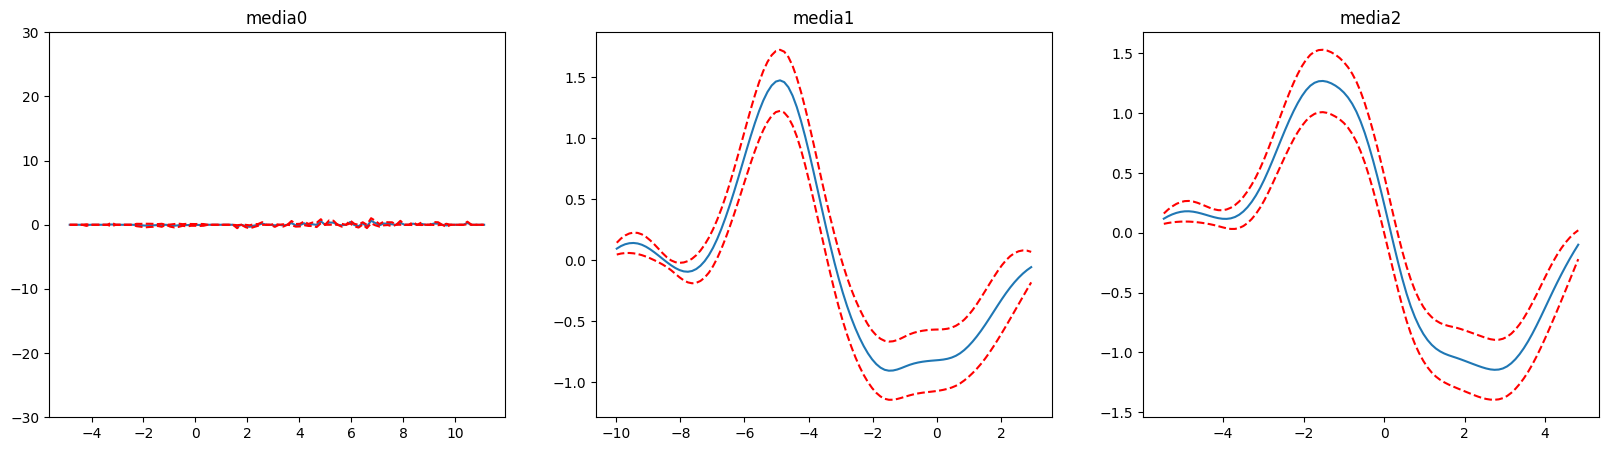

In [65]:
plot_partial_dependence(gam1,3)

In [66]:
gam1.accuracy(x1_test, y1_test)

0.8227146814404432

In [67]:
gam1.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     56.1039
Link Function:                        LogitLink Log Likelihood:                                  -562.1765
Number of Samples:                         1442 AIC:                                             1236.5608
                                                AICc:                                            1241.3559
                                                UBRE:                                               2.8887
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2851
Feature Function                  Lam

In [68]:
gam2 = LogisticGAM(s(0) + s(1) + s(2) + s(4) + s(5), callbacks=['accuracy']).gridsearch(x1_train, y1_train)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:03
 27% (3 of 11) |######                   | Elapsed Time: 0:00:01 ETA:   0:00:02
 36% (4 of 11) |#########                | Elapsed Time: 0:00:01 ETA:   0:00:02
 45% (5 of 11) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:02 ETA:   0:00:01
 72% (8 of 11) |##################       | Elapsed Time: 0:00:02 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:02 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:02 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

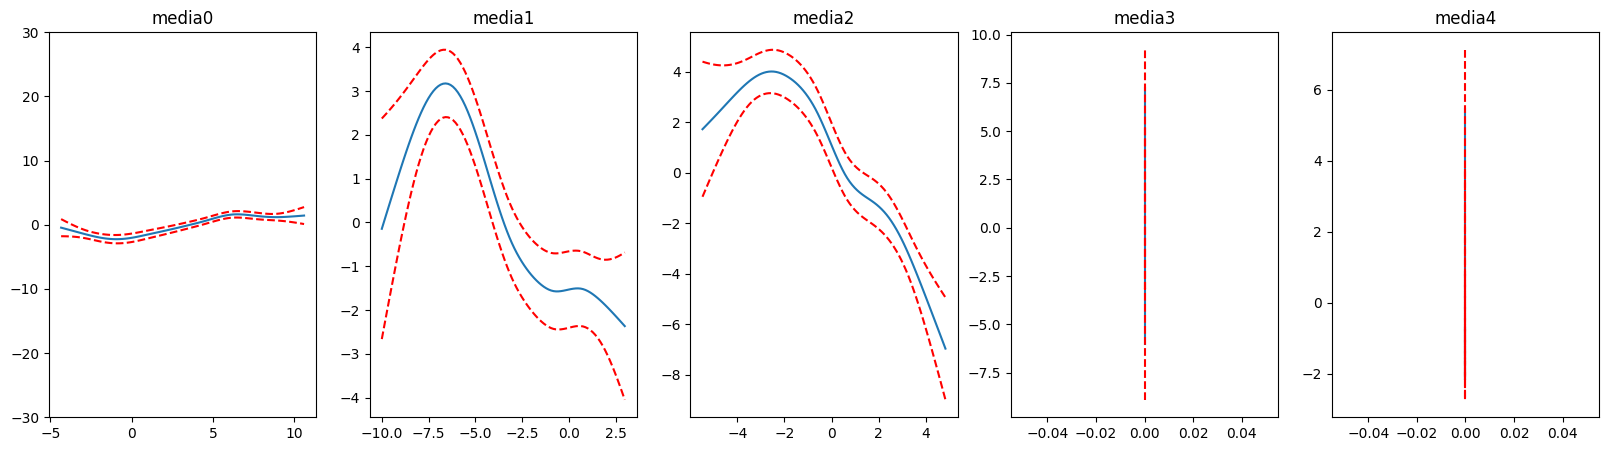

In [69]:
plot_partial_dependence(gam2,5) #ostatnie dwa zle wymyśleć czemu i jak

In [70]:
gam2.accuracy(x1_test, y1_test)

0.9307479224376731

In [71]:
gam2.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     26.2426
Link Function:                        LogitLink Log Likelihood:                                  -351.6083
Number of Samples:                         1442 AIC:                                              755.7018
                                                AICc:                                             756.7903
                                                UBRE:                                               2.5386
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5529
Feature Function                  Lam

In [72]:
gam3 = LogisticGAM(n_splines=10).gridsearch(x1_train, y1_train)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:17
 18% (2 of 11) |####                     | Elapsed Time: 0:00:02 ETA:   0:00:11
 27% (3 of 11) |######                   | Elapsed Time: 0:00:03 ETA:   0:00:08
 36% (4 of 11) |#########                | Elapsed Time: 0:00:04 ETA:   0:00:05
 45% (5 of 11) |###########              | Elapsed Time: 0:00:04 ETA:   0:00:04
 54% (6 of 11) |#############            | Elapsed Time: 0:00:05 ETA:   0:00:03
 63% (7 of 11) |###############          | Elapsed Time: 0:00:06 ETA:   0:00:02
 72% (8 of 11) |##################       | Elapsed Time: 0:00:06 ETA:   0:00:02
 81% (9 of 11) |####################     | Elapsed Time: 0:00:07 ETA:   0:00:01
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:07 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


<Figure size 640x480 with 0 Axes>

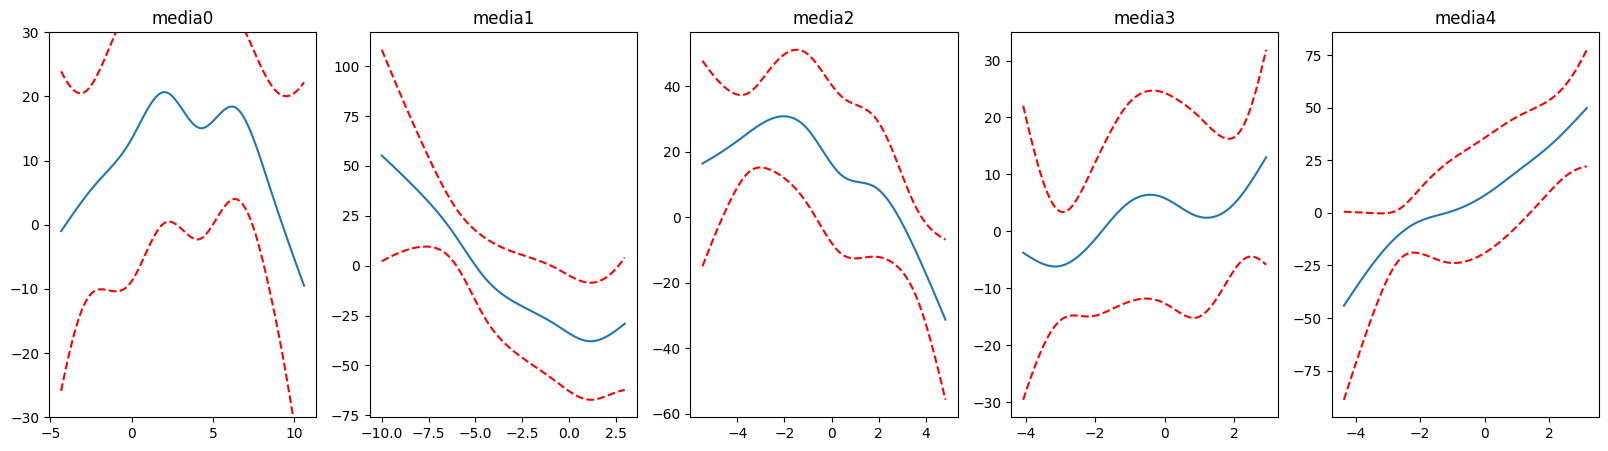

In [73]:
plot_partial_dependence(gam3,5)

In [74]:
gam3.accuracy(x1_test, y1_test)

0.9750692520775623

In [75]:
gam3.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    113.9208
Link Function:                        LogitLink Log Likelihood:                                   -15.0814
Number of Samples:                         1442 AIC:                                              258.0044
                                                AICc:                                             278.0963
                                                UBRE:                                               2.2421
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9808
Feature Function                  Lam

In [76]:
gam4 = LogisticGAM(s(0) + s(1) + s(2) + s(3))
gam4.fit(x1_train, y1_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

<Figure size 640x480 with 0 Axes>

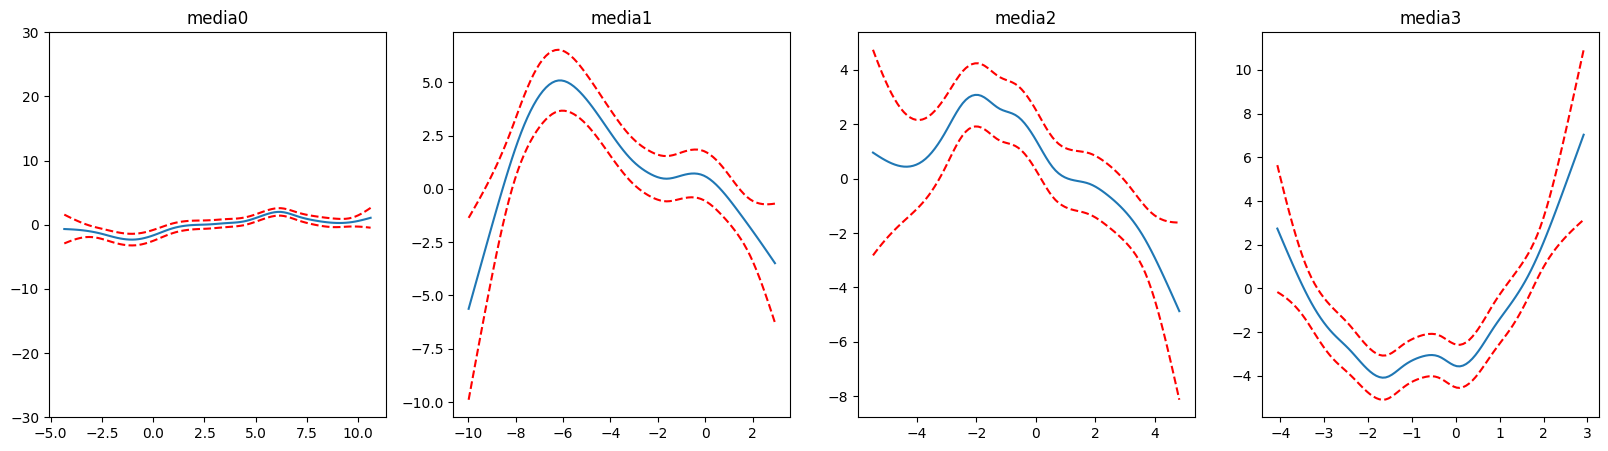

In [77]:
plot_partial_dependence(gam4,4)

In [78]:
gam4.accuracy(x1_test, y1_test)

0.8919667590027701

In [79]:
gam4.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     31.9886
Link Function:                        LogitLink Log Likelihood:                                  -425.4991
Number of Samples:                         1442 AIC:                                              914.9752
                                                AICc:                                             916.5679
                                                UBRE:                                               2.6523
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4589
Feature Function                  Lam

### Cross validation: which model is the best

In [80]:
models = {      'gam1' : gam1, 
                'gam2' : gam2,
                'gam3': gam3, 
                'gam4': gam4 
        }

In [81]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

print('Cross validation with cv=5')
for name, model in models.items():
    scores = cross_val_score(model, x1, y1, cv=5)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nCross validation with cv=10')
for name, model in models.items():
    scores = cross_val_score(model, x1, y1, cv=10)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nLeave One Out Cross validation')
for name,model in models.items():
    loo = LeaveOneOut()
    scores = cross_val_score(model, x1, y1, cv=loo)
    print(f'Result for {name}: Mean = {scores.mean()}, std = {scores.std()}')

Cross validation with cv=5
Results for gam1: Mean = 0.7623268698060942, std = 0.38808221664599063
Results for gam2: Mean = 0.7623268698060942, std = 0.38808221664599063
Results for gam3: Mean = 0.7623268698060942, std = 0.38808221664599063
Results for gam4: Mean = 0.7623268698060942, std = 0.38808221664599063

Cross validation with cv=10
Results for gam1: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam2: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam3: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam4: Mean = 0.7629834254143646, std = 0.39689471061256415

Leave One Out Cross validation
Result for gam1: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam2: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam3: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam4: Mean = 0.762063227953411, std = 0.42582022562888977


### Evaluation metrics

In [82]:
for name, model in models.items():
    print(f'Results for {name}: accuracy = {model.accuracy(x1_test, y1_test)}')

Results for gam1: accuracy = 0.8227146814404432
Results for gam2: accuracy = 0.9307479224376731
Results for gam3: accuracy = 0.9750692520775623
Results for gam4: accuracy = 0.8919667590027701


gam sprawdzic co nie tak bo troche za wysokie te accuracy